In [51]:
import json
import os
import pickle
import time

import pandas as pd
import numpy as np
from src.models import TrafficModel
from tqdm import tqdm

## Load distributions

### Demography distributions

In [2]:
data_dir = 'input_data/base_distributions/demography/'

data_file = 'population_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    population_dist = json.load(f)

data_file = 'demography_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    demography_dist = json.load(f)


### Decision tree distributions

In [3]:
data_dir = 'input_data/base_distributions/decision_tree/'

data_file = 'pub_trans_comfort_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    pub_trans_comfort_dist = json.load(f)

data_file = 'pub_trans_punctuality_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    pub_trans_punctuality_dist = json.load(f)

data_file = 'bicycle_infrastr_comfort_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    bicycle_infrastr_comfort_dist = json.load(f)

data_file = 'pedestrian_inconvenience_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    pedestrian_inconvenience_dist = json.load(f)

data_file = 'household_persons_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    household_persons_dist = json.load(f)

data_file = 'household_cars_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    household_cars_dist = json.load(f)

data_file = 'household_bicycles_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    household_bicycles_dist = json.load(f)

### Travel planning distributions

In [4]:
data_dir = 'input_data/base_distributions/travel_planning/'

data_file = 'travels_num_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    travels_num_dist = json.load(f)

data_file = 'start_hour_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    start_hour_dist = json.load(f)

data_file = 'dest_type_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    dest_type_dist = json.load(f)

data_file = 'gravity_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    gravity_dist = json.load(f)

data_file = 'drivers_dist.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    drivers_dist = json.load(f)

## Load interregional distances and decision tree classifier

In [5]:
data_dir = 'input_data/'

# interregional distances
data_file = 'interregional_distances.json'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'r') as f:
    interregional_distances = json.load(f)


# decision tree
data_file = 'decision_tree.pickle'
data_path = os.path.join(data_dir, data_file)
with open(data_path, 'rb') as f:
    decision_tree = pickle.load(f)

## Spend time distribution

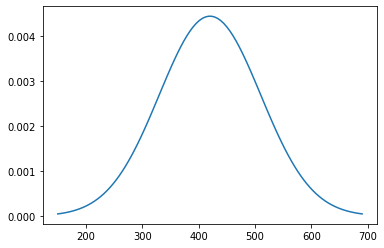

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 420
sigma = 90
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [85]:
# TODO min time in dict

spend_time_dist_params = {
    "6-15_K": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 120, "scale": 30},
        "szkola": {"loc": 390, "scale": 90},
        "uczelnia": {"loc": 120, "scale": 30},
        "inne": {"loc": 120, "scale": 90},
    },
    "6-15_M": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 120, "scale": 30},
        "szkola": {"loc": 390, "scale": 90},
        "uczelnia": {"loc": 120, "scale": 30},
        "inne": {"loc": 120, "scale": 90},
    },
    "16-19_K": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 240, "scale": 120},
        "szkola": {"loc": 390, "scale": 90},
        "uczelnia": {"loc": 390, "scale": 90},
        "inne": {"loc": 120, "scale": 90},
    },
    "16-19_M": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 240, "scale": 120},
        "szkola": {"loc": 390, "scale": 90},
        "uczelnia": {"loc": 390, "scale": 90},
        "inne": {"loc": 120, "scale": 90},
    },
    "20-24_K": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 480, "scale": 60},
        "szkola": {"loc": 240, "scale": 90},
        "uczelnia": {"loc": 390, "scale": 90},
        "inne": {"loc": 120, "scale": 90},
    },
    "20-24_M": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 480, "scale": 60},
        "szkola": {"loc": 240, "scale": 90},
        "uczelnia": {"loc": 390, "scale": 90},
        "inne": {"loc": 120, "scale": 90},
    },
    "25-44_K": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 420, "scale": 90},
        "szkola": {"loc": 30, "scale": 30},
        "uczelnia": {"loc": 390, "scale": 120},
        "inne": {"loc": 120, "scale": 60},
    },
    "25-44_M": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 420, "scale": 90},
        "szkola": {"loc": 30, "scale": 30},
        "uczelnia": {"loc": 390, "scale": 120},
        "inne": {"loc": 120, "scale": 60},
    },
    "45-60_K": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 420, "scale": 90},
        "szkola": {"loc": 30, "scale": 30},
        "uczelnia": {"loc": 390, "scale": 120},
        "inne": {"loc": 120, "scale": 60},
    },
    "45-65_M": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 420, "scale": 90},
        "szkola": {"loc": 30, "scale": 30},
        "uczelnia": {"loc": 390, "scale": 120},
        "inne": {"loc": 120, "scale": 60},
    },
    "61-x_K": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 240, "scale": 120},
        "szkola": {"loc": 30, "scale": 30},
        "uczelnia": {"loc": 240, "scale": 120},
        "inne": {"loc": 120, "scale": 60},
    },
    "66-x_M": {
        "dom": {"loc": 120, "scale": 60},
        "praca": {"loc": 240, "scale": 120},
        "szkola": {"loc": 30, "scale": 30},
        "uczelnia": {"loc": 240, "scale": 120},
        "inne": {"loc": 120, "scale": 60},
    }
}

In [86]:
# with open('input_data/base_distributions/travel_planning/spend_time_dist_params.json', 'w') as f:
#     json.dump(spend_time_dist_params, f)

## TrafficModel test

In [7]:
start_timer = time.time()

In [9]:
start_time = 4 * 60
step_time = 60
end_time = 23 * 60


model = TrafficModel(
    N=10000,  # 635701
    population_dist=population_dist,
    demography_dist=demography_dist,
    pub_trans_comfort_dist=pub_trans_comfort_dist,
    pub_trans_punctuality_dist=pub_trans_punctuality_dist,
    bicycle_infrastr_comfort_dist=bicycle_infrastr_comfort_dist,
    pedestrian_inconvenience_dist=pedestrian_inconvenience_dist,
    household_persons_dist=household_persons_dist,
    household_cars_dist=household_cars_dist,
    household_bicycles_dist=household_bicycles_dist,
    travels_num_dist=travels_num_dist,
    start_hour_dist=start_hour_dist,
    dest_type_dist=dest_type_dist,
    spend_time_dist_params=spend_time_dist_params,
    decision_tree=decision_tree,
    gravity_dist=gravity_dist,
    drivers_dist=drivers_dist,
    interregional_distances=interregional_distances,
    start_time=start_time,
    step_time=step_time,
    end_time=end_time
)

In [10]:
for i in tqdm(range(start_time, end_time+1, step_time)):
    model.step()

print()
print(time.time() - start_timer)

100%|██████████| 20/20 [00:03<00:00,  6.11it/s]
146.69366908073425



In [11]:
model.agent_data_collector.get_agent_vars_dataframe().head(30)

agent_id home_region  age_sex  pub_trans_comfort  \
Step AgentID                                                     
0    0               0         163   61-x_K                4.0   
     1               1         199  45-60_K                3.0   
     2               2          54   6-15_K                2.0   
     3               3         181  25-44_K                4.0   
     4               4          65   61-x_K                3.0   
     5               5         345   61-x_K                4.0   
     6               6          59   61-x_K                3.0   
     7               7          54   66-x_M                2.0   
     8               8         305      0-5                NaN   
     9               9          23  25-44_M                3.0   
     10             10         367      0-5                NaN   
     11             11         103  25-44_M                1.0   
     12             12          86  25-44_K                3.0   
     13             13         293  16-19_M                3.0   
     14             14         292  45-65_M                3.0   
     15             15          93      0-5                NaN   
     16             16          12  25-44_K                3.0   
     17             17         323  45-65_M                3.0   
     18             18         157  45-65_M                2.0   
     19             19          61   66-x_M                4.0   
     20             20         144  25-44_K                1.0   
     21             21         291  25-44_M                2.0   
     22             22         159  25-44_M                4.0   
     23             23         366   61-x_K                2.0   
     24             24          54  25-44_K                2.0   
     25             25         305  25-44_M                3.0   
     26             26          35  25-44_M                2.0   
     27             27          50   6-15_K                2.0   
     28             28         107  25-44_K                3.0   
     29             29         357  45-65_M                2.0   

              pub_trans_punctuality  bicycle_infrastr_comfort  \
Step AgentID                                                    
0    0                          3.0                       3.0   
     1                          3.0                       2.0   
     2                          4.0                       1.0   
     3                          3.0                       4.0   
     4                          3.0                       2.0   
     5                          3.0                       2.0   
     6                          4.0                       4.0   
     7                          3.0                       2.0   
     8                          NaN                       NaN   
     9                          3.0                       4.0   
     10                         NaN                       NaN   
     11                         2.0                       2.0   
     12                         3.0                       3.0   
     13                         1.0                       2.0   
     14                         1.0                       3.0   
     15                         NaN                       NaN   
     16                         2.0                       2.0   
     17                         2.0                       4.0   
     18                         2.0                       2.0   
     19                         3.0                       4.0   
     20                         3.0                       3.0   
     21                         4.0                       4.0   
     22                         2.0                       2.0   
     23                         3.0                       3.0   
     24                         2.0                       2.0   
     25                         2.0                       2.0   
     26                         3.0                       3.0   
     27         

In [13]:
model.travels_data_collector.get_agent_vars_dataframe().head(10)

agent_id              start_region  \
Step AgentID                                       
20   0               0                [163, 167]   
     1               1                [199, 257]   
     2               2  [54, 61, 54, 20, 54, 54]   
     3               3                [181, 158]   
     4               4                        []   
     5               5                        []   
     6               6                 [59, 256]   
     7               7                        []   
     8               8                        []   
     9               9                  [23, 23]   

                                 start_place_type               dest_region  \
Step AgentID                                                                  
20   0                                [dom, inne]                [167, 163]   
     1                                [dom, inne]                [257, 199]   
     2        [dom, inne, dom, szkola, dom, inne]  [61, 54, 20, 54, 54, 54]   
     3                               [dom, praca]                [158, 181]   
     4                                         []                        []   
     5                                         []                        []   
     6                                [dom, inne]                 [256, 59]   
     7                                         []                        []   
     8                                         []                        []   
     9                               [dom, praca]                  [23, 23]   

                                  dest_place_type  \
Step AgentID                                        
20   0                                [inne, dom]   
     1                                [inne, dom]   
     2        [inne, dom, szkola, dom, inne, dom]   
     3                               [praca, dom]   
     4                                         []   
     5                                         []   
     6                                [inne, dom]   
     7                                         []   
     8                                         []   
     9                               [praca, dom]   

                           travel_start_time      transport_mode  \
Step AgentID                                                       
20   0                          [1300, 1347]              [1, 1]   
     1                            [489, 702]              [1, 1]   
     2        [449, 616, 764, 809, 849, 883]  [3, 3, 0, 0, 3, 3]   
     3                            [382, 572]              [1, 1]   
     4                                    []                  []   
     5                                    []                  []   
     6                          [1001, 1058]              [0, 0]   
     7                                    []                  []   
     8                                    []                  []   
     9                            [491, 655]              [3, 3]   

                                   is_driver  
Step AgentID                                  
20   0                          [None, None]  
     1                          [None, None]  
     2        [None, None, 0, 0, None, None]  
     3                          [None, None]  
     4                                    []  
     5                                    []  
     6                                [0, 1]  
     7                                    []  
     8                                    []  
     9                          [None, None]

In [59]:
df = model.travels_data_collector.get_agent_vars_dataframe()

In [60]:
# https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows/40449726#40449726

def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [61]:
new_df = explode(
    df[df['start_region'].astype(str) != '[]'],
    ['start_region', 'start_place_type', 'dest_region',
       'dest_place_type', 'travel_start_time', 'transport_mode', 'is_driver'],
    fill_value=''
)

In [62]:
new_df

,agent_id,start_region,start_place_type,dest_region,dest_place_type,travel_start_time,transport_mode,is_driver
0,0,163,dom,167,inne,1300,1,None
1,0,167,inne,163,dom,1347,1,None
2,1,199,dom,257,inne,489,1,None
3,1,257,inne,199,dom,702,1,None
4,2,54,dom,61,inne,449,3,None
...,...,...,...,...,...,...,...,...
15639,9996,65,dom,65,dom,776,0,1
15640,9997,143,dom,139,inne,894,2,None
15641,9997,139,inne,143,dom,1035,2,None
15642,9998,165,dom,96,uczelnia,519,0,0
